In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
import json
import cv2
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-01-11 17:57:53.637611: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
train_image_folder = '/raid/mpsych/OMAMA/DATA/data/train'
train_npz_folder = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images'

In [25]:
new_window_center = 2800.0
new_window_width = 800.0

file_counter = 0
max_files_to_process = 1000

adjusted_npz_folder = '/raid/mpsych/OMAMA/DATA/data/adjusted_2d_512'

adjusted_images = []

for filename in os.listdir(train_npz_folder):
    if filename.endswith(".npz"):
        npz_file_path = os.path.join(train_npz_folder, filename)
        data = np.load(npz_file_path)

        image_data = data['data']

        adjusted_image_data = (image_data - (new_window_center - 0.5 * new_window_width)) / new_window_width

        adjusted_image_data = np.clip(adjusted_image_data, 0, 1)
        adjusted_images.append(adjusted_image_data)
        
        file_counter += 1
        
        # Save the adjusted image data to a new NPZ file in the adjusted_npz_folder
        adjusted_npz_file_path = os.path.join(adjusted_npz_folder, filename)
        np.savez(adjusted_npz_file_path, data=adjusted_image_data)

        # Break the loop if the maximum number of files to process is reached
        if file_counter >= max_files_to_process:
            break

In [26]:
# Get lists of image and npz files
image_files = [os.path.join(train_image_folder, f) for f in os.listdir(train_image_folder) if f.endswith('.png')]
# npz_files = [os.path.join(train_npz_folder, f) for f in os.listdir(train_npz_folder) if f.endswith('.npz')]
npz_files = [os.path.join(adjusted_npz_folder, f) for f in os.listdir(adjusted_npz_folder) if f.endswith('.npz')]

In [13]:
json_folder = '/raid/mpsych/OMAMA/DATA/data/2d/metadata'

In [14]:
jsons = os.listdir(json_folder)

In [15]:
for i,j in enumerate(jsons):
    with open(os.path.join(json_folder, j),'r') as f:
        d = json.load(f)

In [13]:
d

{'PatientID': 'DHHHIH5NOESG',
 'View': 'cranio-caudal',
 'WindowCenter': [2773.0, 2815.0, 2683.0],
 'WindowWidth': [900.0, 750.0, 1050.0],
 'WindowCenterWidthExplanation': ['NORMAL', 'HARDER', 'SOFTER'],
 'ImagerPixelSpacing': [0.09409090909091, 0.09409090909091],
 'ImageLaterality': 'R',
 'coords': [1422.0, 510.0, 1676.0, 725.0],
 'score': 0.27526184916496277,
 'label': 'NonCancer'}

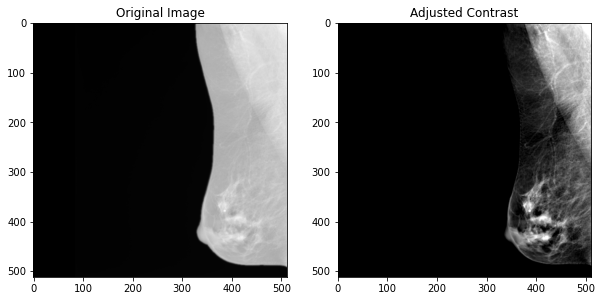

In [4]:
npz_file_path = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
data = np.load(npz_file_path)

image_data = data['data']

new_window_center = 2800.0
new_window_width = 800.0

adjusted_image_data = (image_data - (new_window_center - 0.5 * new_window_width)) / new_window_width

adjusted_image_data = np.clip(adjusted_image_data, 0, 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_data, cmap='gray')
plt.title('Adjusted Contrast')

plt.show()


In [4]:
# Check if there are any files in the lists
if image_files:
    # Get the first image file in the list
    first_image_file = image_files[0]

    # Read the image using OpenCV
    image = cv2.imread(first_image_file)

    # Get the shape of the image
    image_shape = image.shape
    print(f"Shape of the first image: {image_shape}")
else:
    print("No image files found.")

if npz_files:
    # Get the first npz file in the list
    first_npz_file = npz_files[0]

    # Load the npz file using NumPy
    npz_data = np.load(first_npz_file)

    # Get the shape of the data in the npz file
    npz_data_shape = npz_data['data'].shape
    print(f"Shape of the data in the first npz file: {npz_data_shape}")
else:
    print("No npz files found.")

Shape of the first image: (640, 512, 3)
Shape of the data in the first npz file: (512, 512)


In [29]:
image_files = image_files[:1000]

In [27]:
npz_files = npz_files[:1000]

In [30]:
len(image_files)

1000

In [31]:
len(npz_files)

1000

In [36]:
# Split the dataset (adjust the test_size as needed)
train_files, test_files = train_test_split(list(zip(image_files, npz_files)), test_size=0.3, random_state=42)
val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

In [37]:
print(f"Train set length: {len(train_files)}")
print(f"Validation set length: {len(val_files)}")
print(f"Test set length: {len(test_files)}")

Train set length: 700
Validation set length: 150
Test set length: 150


In [38]:
# Displaying a few samples from the splits
print("Train set samples:")
for img_file, npz_file in train_files[:5]:
    print(f"Image File: {img_file}, NPZ File: {npz_file}")

print("Test set samples:")
for img_file, npz_file in test_files[:5]:
    print(f"Image File: {img_file}, NPZ File: {npz_file}")

print("val set samples:")
for img_file, npz_file in val_files[:5]:
    print(f"Image File: {img_file}, NPZ File: {npz_file}")


Train set samples:
Image File: /raid/mpsych/OMAMA/DATA/data/train/sample_97053.png, NPZ File: /raid/mpsych/OMAMA/DATA/data/adjusted_2d_512/123130608588931320661714661659852290476.npz
Image File: /raid/mpsych/OMAMA/DATA/data/train/sample_68631.png, NPZ File: /raid/mpsych/OMAMA/DATA/data/adjusted_2d_512/179930201341354579052789416995351382686.npz
Image File: /raid/mpsych/OMAMA/DATA/data/train/sample_98597.png, NPZ File: /raid/mpsych/OMAMA/DATA/data/adjusted_2d_512/172144569097262106359102262153672578818.npz
Image File: /raid/mpsych/OMAMA/DATA/data/train/sample_55955.png, NPZ File: /raid/mpsych/OMAMA/DATA/data/adjusted_2d_512/164972691932880849151404656007053248163.npz
Image File: /raid/mpsych/OMAMA/DATA/data/train/sample_73172.png, NPZ File: /raid/mpsych/OMAMA/DATA/data/adjusted_2d_512/114790356269243720722476101569836228835.npz
Test set samples:
Image File: /raid/mpsych/OMAMA/DATA/data/train/sample_59574.png, NPZ File: /raid/mpsych/OMAMA/DATA/data/adjusted_2d_512/26311155229066746137964

Train set samples:


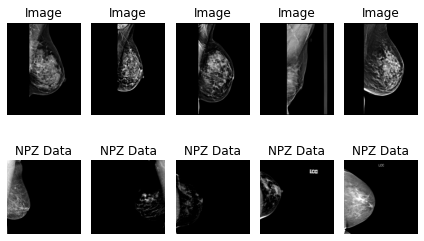

Test set samples:


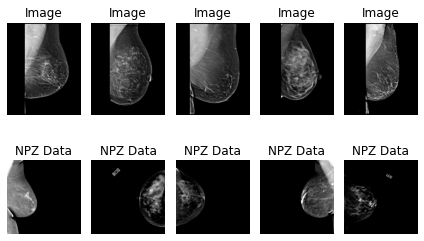

Validation set samples:


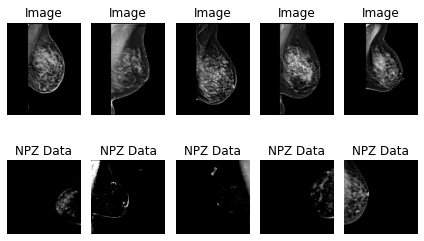

In [40]:
def display_samples(file_list, num_samples=5):
    for i, (img_file, npz_file) in enumerate(file_list[:num_samples]):
        image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        npz_data = np.load(npz_file)['data']

        # Plotting image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title('Synthetic')
        plt.axis('off')

        # Plotting NPZ data
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(npz_data, cmap='gray') 
        plt.title('Real')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display samples from train, test, and validation sets
print("Train set samples:")
display_samples(train_files)

print("Test set samples:")
display_samples(test_files)

print("Validation set samples:")
display_samples(val_files)


In [41]:
img_height = 512
img_width = 512
batch_size = 32

In [42]:
def custom_data_generator(file_list, batch_size, img_height, img_width):
    total_files = len(file_list)
    indices = np.arange(total_files)
    np.random.shuffle(indices)

    while True:
        for i in range(0, total_files, batch_size):
            batch_indices = indices[i:i + batch_size]
            batch_images = []
            batch_npz = []
            batch_labels = []

            for idx in batch_indices:
                img_file, npz_file = file_list[idx]

                # Process image file
                image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (img_width, img_height))
                image = np.expand_dims(image, axis=-1)
                image = image / 255.0 
                batch_images.append(image)

                # Process npz file
                with np.load(npz_file, allow_pickle=True) as data:
                    npz = data['data']
                npz = np.expand_dims(npz, axis=-1)
                npz = (npz - npz.min()) / (npz.max() - npz.min())
                batch_npz.append(npz)

                # Assign class labels
                if img_file.endswith('.png'):
                    label = [1, 0]
                elif npz_file.endswith('.npz'):
                    label = [0, 1]
                else:
                    label = [0, 0]
                    
                batch_labels.append(label)
                

            combined_batch = np.concatenate((batch_images, batch_npz), axis=-1)
            print(f"Combined Batch Shape: {combined_batch.shape}")
            yield (combined_batch, np.array(batch_labels))
            print(f"Image Shape: {image.shape}, NPZ Shape: {npz.shape}")
            
            print(f"Image Data Range: Min={image.min()}, Max={image.max()}")
            print(f"NPZ Data Range: Min={npz.min()}, Max={npz.max()}")


Combined Batch Shape: (32, 512, 512, 2)


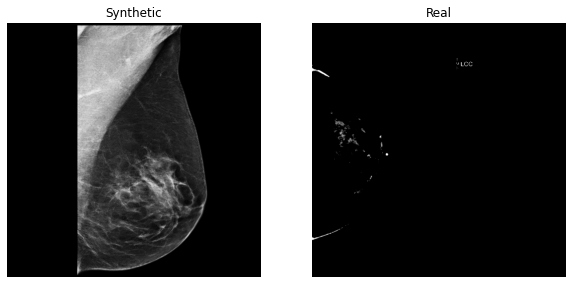

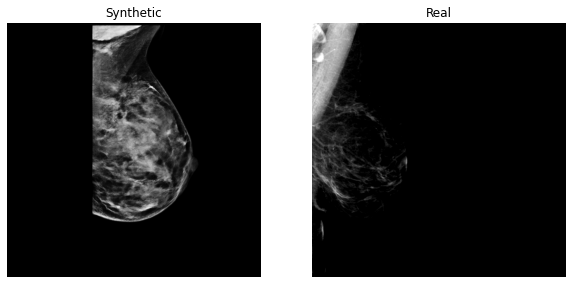

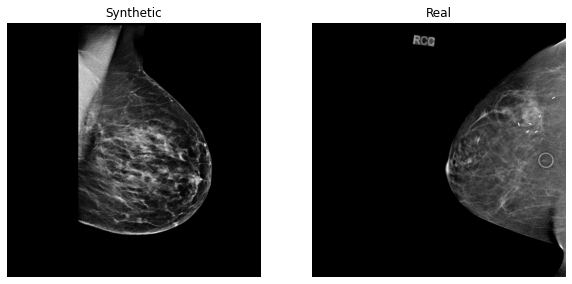

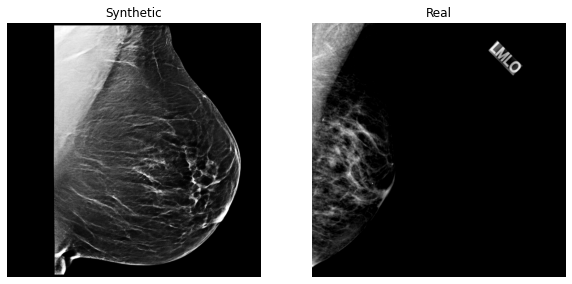

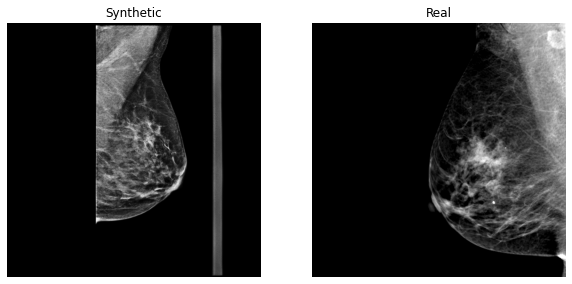

Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)


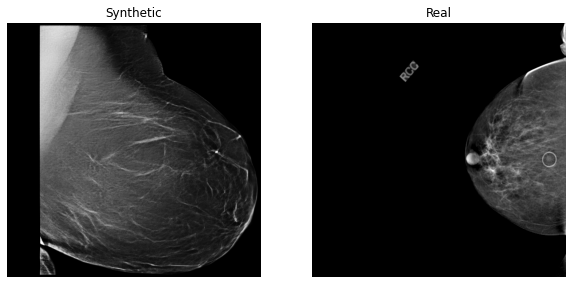

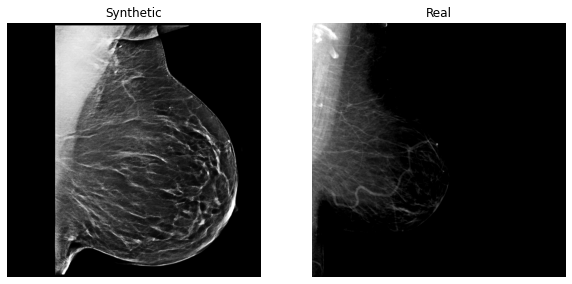

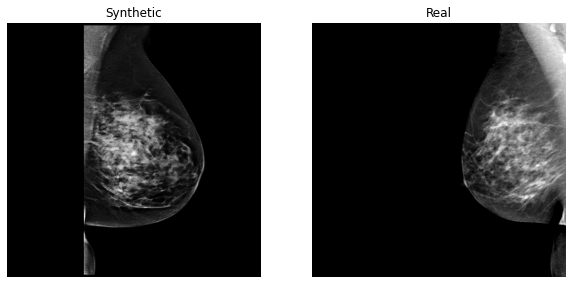

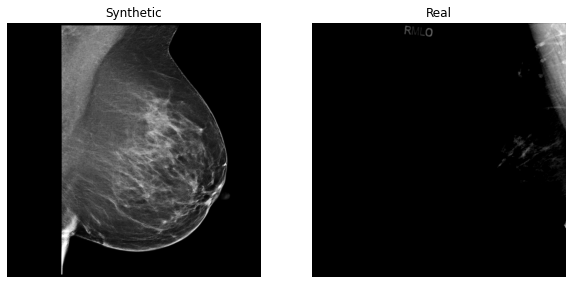

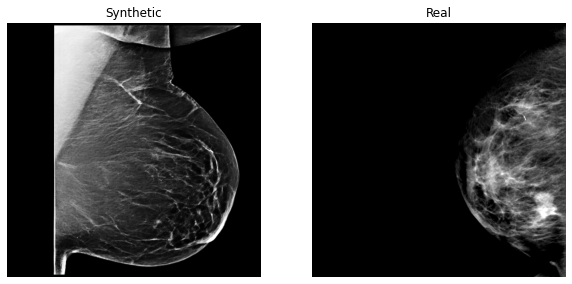

Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)


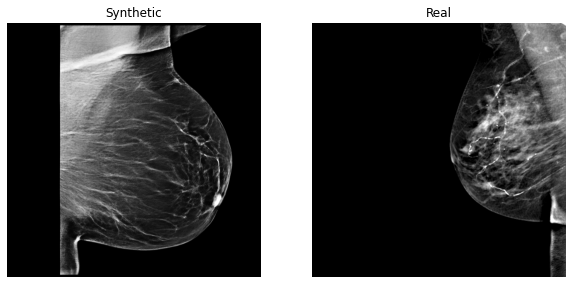

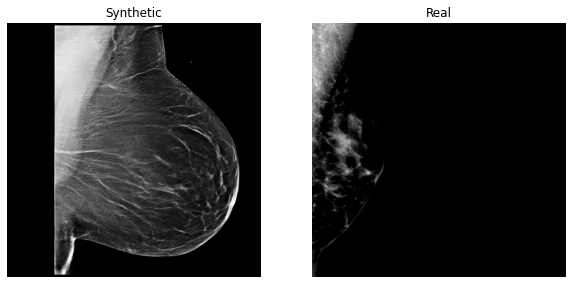

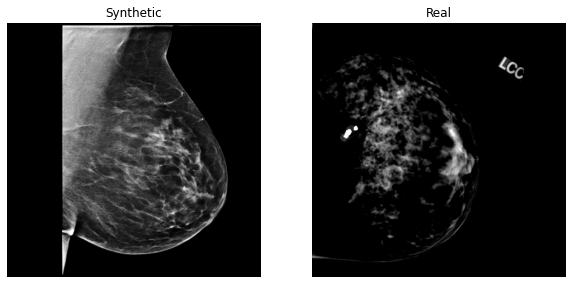

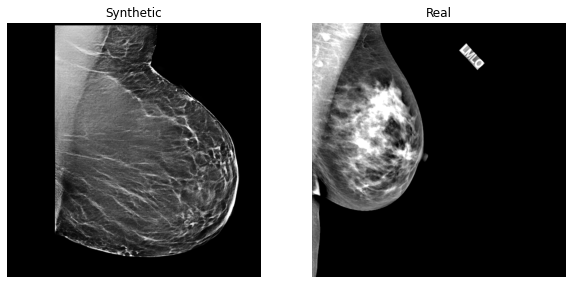

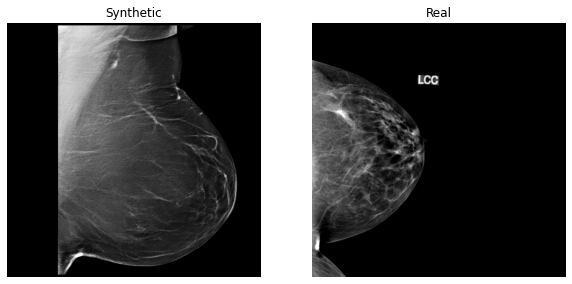

In [44]:
# Create a custom data generator for visualization
visualization_generator = custom_data_generator(train_files, batch_size, img_height, img_width)

# Extract a few batches of data and labels from the generator
num_batches_to_visualize = 3  # Number of batches to visualize
samples_per_batch = 5  # Number of samples per batch to display

for batch_idx in range(num_batches_to_visualize):
    batch_data, batch_labels = next(visualization_generator)
    
    # Display a few samples from the batch
    for sample_idx in range(samples_per_batch):
        sample_image = batch_data[sample_idx, :, :, 0]  # Extracting the image data (assuming it's the first channel)
        sample_npz = batch_data[sample_idx, :, :, 1]    # Extracting the NPZ data (assuming it's the second channel)
        
        # Plot the sample image and NPZ data
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(sample_image, cmap='gray')
        plt.title(f'Synthetic')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(sample_npz, cmap='gray')
        plt.title('Real')
        plt.axis('off')
        
        plt.show()


In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001, mode='min')

In [46]:
NUMBER_OF_CLASSES = 2

In [47]:
# Create data generators
train_generator = custom_data_generator(train_files, batch_size, img_height, img_width)
val_generator = custom_data_generator(val_files, batch_size, img_height, img_width)
test_generator = custom_data_generator(test_files, batch_size, img_height, img_width)


In [48]:
# Modify the model for deeper architecture
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# Additional Convolutional layers
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# Flatten and Dense layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))
model.summary()

2024-01-11 18:31:51.820341: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-01-11 18:31:51.921854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-01-11 18:31:51.921897: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-01-11 18:31:51.985518: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-01-11 18:31:51.985584: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-01-11 18:31:52.004347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 128)     0

2024-01-11 18:31:52.038042: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 18:31:52.040731: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-01-11 18:31:52.045738: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2024-01-11 18:31:52.046574: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-01-11 18:31:53.080850: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

In [49]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adadelta",
              metrics=['accuracy'])

In [50]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_files) // batch_size,
        epochs=1,
        validation_data=val_generator,
        validation_steps=len(val_files) // batch_size,
        verbose=1,
        callbacks=[early_stopping]
    )
except Exception as e:
    print("An error occurred during training:", str(e))

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_files) // batch_size)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Combined Batch Shape: (32, 512, 512, 2)


2024-01-11 18:32:01.145184: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-01-11 18:32:01.163219: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245720000 Hz


Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)


2024-01-11 18:32:14.852418: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-01-11 18:32:16.090365: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-01-11 18:32:17.658349: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-01-11 18:32:17.658373: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-01-11 18:32:17.659243: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-01-11 18:32:29.070353: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-01-11 18:32:30.623378: I tensorflow/stream_exec

 1/21 [>.............................] - ETA: 27:41 - loss: 0.6998 - accuracy: 0.4375Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=0.8745098039215686
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)
 2/21 [=>............................] - ETA: 7s - loss: 0.6818 - accuracy: 0.5781   Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)
 3/21 [===>..........................] - ETA: 7s - loss: 0.6658 - accuracy: 0.6562Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)
 4/21 [====>.........................] - ETA: 6s - loss: 0.6490 - accuracy: 0.7070Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=0.996078431372549
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 5

/tmp/ipykernel_2941089/1533064637.py:27: RuntimeWarning: invalid value encountered in true_divide
  npz = (npz - npz.min()) / (npz.max() - npz.min())


Combined Batch Shape: (32, 512, 512, 2)
14/21 [===================>..........] - ETA: 2s - loss: 0.5137 - accuracy: 0.8694Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)
15/21 [====================>.........] - ETA: 2s - loss: 0.5037 - accuracy: 0.8756Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)
16/21 [=====================>........] - ETA: 2s - loss: 0.4962 - accuracy: 0.8811Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)
17/21 [=======================>......] - ETA: 1s - loss: 0.4906 - accuracy: 0.8862Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 5

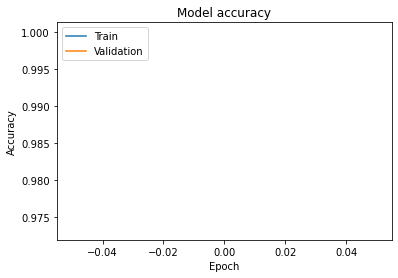

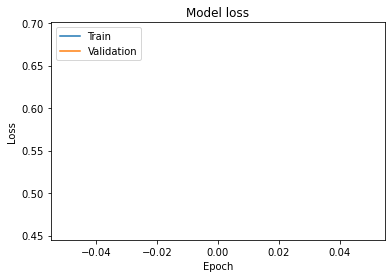

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Combined Batch Shape: (32, 512, 512, 2)
Sample 1:
Image Shape: (512, 512), NPZ Shape: (512, 512)
Image Max Value: 1.0
NPZ Max Value: 1.0


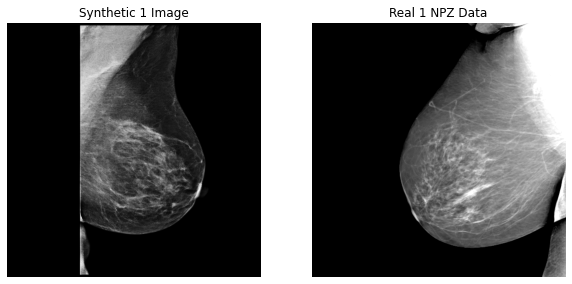

Sample 2:
Image Shape: (512, 512), NPZ Shape: (512, 512)
Image Max Value: 1.0
NPZ Max Value: 1.0


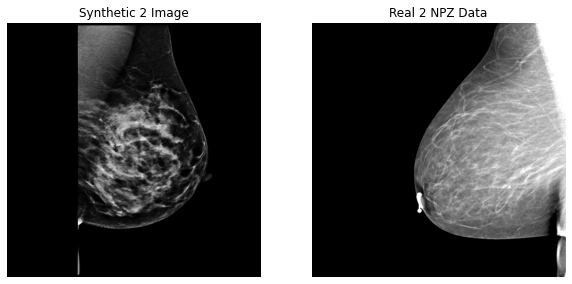

Sample 3:
Image Shape: (512, 512), NPZ Shape: (512, 512)
Image Max Value: 1.0
NPZ Max Value: 1.0


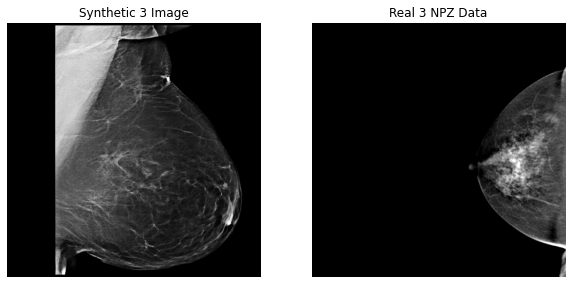

In [52]:
import matplotlib.pyplot as plt

# Create a test generator
test_generator = custom_data_generator(test_files, batch_size, img_height, img_width)

# Get a batch of test data and labels
test_data, test_labels = next(test_generator)

# Display information and plot data for a few samples
num_samples_to_display = 3  # Number of samples to display

for i in range(num_samples_to_display):
    # Extract a sample from the batch
    sample_image = test_data[i, :, :, 0]  # Extracting the image data (assuming it's the first channel)
    sample_npz = test_data[i, :, :, 1]    # Extracting the NPZ data (assuming it's the second channel)
    
    
    # Display shape and max values
    print(f"Sample {i + 1}:")
    print(f"Image Shape: {sample_image.shape}, NPZ Shape: {sample_npz.shape}")
    print(f"Image Max Value: {np.max(sample_image)}")
    print(f"NPZ Max Value: {np.max(sample_npz)}")
    
    # Plot the sample image and NPZ data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Synthetic {i + 1} Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(sample_npz, cmap='gray')
    plt.title(f'Real {i + 1} NPZ Data')
    plt.axis('off')
    
    plt.show()


Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=0.9098039215686274
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)


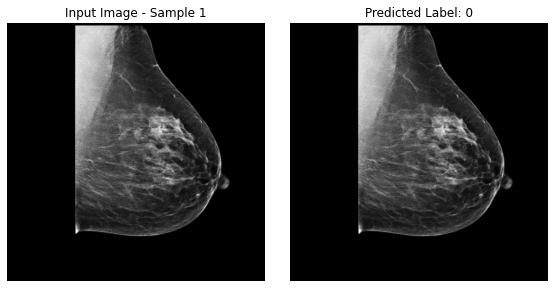

Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)


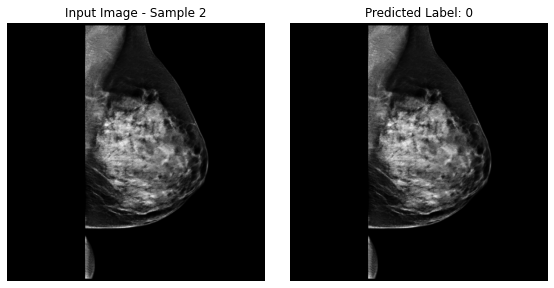

Image Shape: (512, 512, 1), NPZ Shape: (512, 512, 1)
Image Data Range: Min=0.0, Max=1.0
NPZ Data Range: Min=0.0, Max=1.0
Combined Batch Shape: (32, 512, 512, 2)


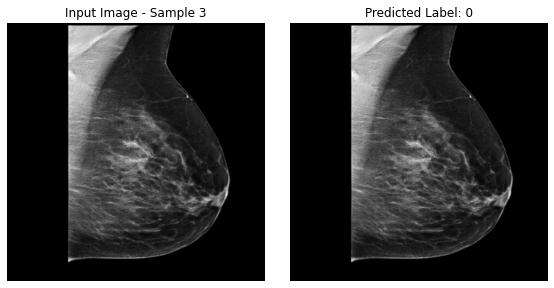

In [53]:
import matplotlib.pyplot as plt

for i in range(3):
    test_sample, test_label = next(test_generator)
    prediction = model.predict(test_sample)
    
    # Select an index from the batch to visualize
    sample_index = 0  # You can change this index to visualize different samples
    
    # Display the input image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Input Image - Sample {i + 1}")
    plt.imshow(test_sample[sample_index, :, :, 0], cmap='gray')  # Assuming gray-scale images
    plt.axis('off')

    # Display the predicted label
    plt.subplot(1, 2, 2)
    plt.title(f"Predicted Label: {prediction[sample_index].argmax()}")
    plt.imshow(test_sample[sample_index, :, :, 0], cmap='gray')  # Assuming gray-scale images
    plt.axis('off')

    plt.tight_layout()
    plt.show()
